In [2]:
# Data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical visualization
import plotly.express as px
import plotly.graph_objects as go

# For interactive visualizations
import plotly.offline as pyo

# For inline display in Jupyter notebooks
%matplotlib inline

# Optional: Set visualization styles
plt.style.use('seaborn-v0_8')  # or 'ggplot', 'fivethirtyeight'
sns.set_palette("husl")

In [3]:
pip install numpy pandas matplotlib seaborn plotly scipy scikit-learn statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
# Cell 1: Basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Cell 2: Additional imports if needed
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(r"C:\Users\ACER\Downloads\financial_loan_data_excel.xlsx - financial_loan.csv")

In [6]:
df.head()

,id,address_state,application_type,emp_length,emp_title,grade,home_ownership,issue_date,last_credit_pull_date,last_payment_date,loan_status,next_payment_date,member_id,purpose,sub_grade,term,verification_status,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
0,1077430,GA,INDIVIDUAL,< 1 year,Ryder,C,RENT,2/11/2021,9/13/2021,4/13/2021,Charged Off,5/13/2021,1314167,car,C4,60 months,Source Verified,30000.0,0.0100,59.83,0.1527,2500,4,1009
1,1072053,CA,INDIVIDUAL,9 years,MKC Accounting,E,RENT,1/1/2021,12/14/2021,1/15/2021,Fully Paid,2/15/2021,1288686,car,E1,36 months,Source Verified,48000.0,0.0535,109.43,0.1864,3000,4,3939
2,1069243,CA,INDIVIDUAL,4 years,Chemat Technology Inc,C,RENT,1/5/2021,12/12/2021,1/9/2021,Charged Off,2/9/2021,1304116,car,C5,36 months,Not Verified,50000.0,0.2088,421.65,0.1596,12000,11,3522
3,1041756,TX,INDIVIDUAL,< 1 year,barnes distribution,B,MORTGAGE,2/25/2021,12/12/2021,3/12/2021,Fully Paid,4/12/2021,1272024,car,B2,60 months,Source Verified,42000.0,0.0540,97.06,0.1065,4500,9,4911
4,1068350,IL,INDIVIDUAL,10+ years,J&J Steel Inc,A,MORTGAGE,1/1/2021,12/14/2021,1/15/2021,Fully Paid,2/15/2021,1302971,car,A1,36 months,Verified,83000.0,0.0231,106.53,0.0603,3500,28,3835


In [7]:
print(df.dtypes)

id                         int64
address_state             object
application_type          object
emp_length                object
emp_title                 object
grade                     object
home_ownership            object
issue_date                object
last_credit_pull_date     object
last_payment_date         object
loan_status               object
next_payment_date         object
member_id                  int64
purpose                   object
sub_grade                 object
term                      object
verification_status       object
annual_income            float64
dti                      float64
installment              float64
int_rate                 float64
loan_amount                int64
total_acc                  int64
total_payment              int64
dtype: object


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38576 entries, 0 to 38575
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     38576 non-null  int64  
 1   address_state          38576 non-null  object 
 2   application_type       38576 non-null  object 
 3   emp_length             38576 non-null  object 
 4   emp_title              37138 non-null  object 
 5   grade                  38576 non-null  object 
 6   home_ownership         38576 non-null  object 
 7   issue_date             38576 non-null  object 
 8   last_credit_pull_date  38576 non-null  object 
 9   last_payment_date      38576 non-null  object 
 10  loan_status            38576 non-null  object 
 11  next_payment_date      38576 non-null  object 
 12  member_id              38576 non-null  int64  
 13  purpose                38576 non-null  object 
 14  sub_grade              38576 non-null  object 
 15  te

In [9]:
print(df.describe())

                 id     member_id  annual_income           dti   installment  \
count  3.857600e+04  3.857600e+04   3.857600e+04  38576.000000  38576.000000   
mean   6.810371e+05  8.476515e+05   6.964454e+04      0.133274    326.862965   
std    2.113246e+05  2.668105e+05   6.429368e+04      0.066662    209.092000   
min    5.473400e+04  7.069900e+04   4.000000e+03      0.000000     15.690000   
25%    5.135170e+05  6.629788e+05   4.150000e+04      0.082100    168.450000   
50%    6.627280e+05  8.473565e+05   6.000000e+04      0.134200    283.045000   
75%    8.365060e+05  1.045652e+06   8.320050e+04      0.185900    434.442500   
max    1.077501e+06  1.314167e+06   6.000000e+06      0.299900   1305.190000   

           int_rate   loan_amount     total_acc  total_payment  
count  38576.000000  38576.000000  38576.000000   38576.000000  
mean       0.120488  11296.066855     22.132544   12263.348533  
std        0.037164   7460.746022     11.392282    9051.104777  
min        0.054200

In [10]:
# 1. Total Loan Applications

In [11]:

total_applications = df['id'].count()
print(f"Total Loan Applications: {total_applications}")



Total Loan Applications: 38576


In [12]:
import pandas as pd
from datetime import datetime

# Aapka data
df =df
# ✅ ERROR SOLVED: Date column convert karo
df['issue_date'] = pd.to_datetime(df['issue_date'])

print("=" * 60)
print("MTD vs PMTD - TOTAL LOAN APPLICATIONS")
print("=" * 60)

# STEP 1: Latest issue date (ab error nahi aayega)
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

print(f"\n📅 Latest Issue Date: {latest_issue_date.strftime('%B %d, %Y')}")
print(f"📅 Latest Year: {latest_year}")
print(f"📅 Latest Month: {latest_month}")
print("-" * 60)

# STEP 2: MTD Calculation
mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
mtd_loan_applications = mtd_data['id'].count()

print(f"\n📈 MTD Loan Applications for {latest_issue_date.strftime('%B %Y')}: {mtd_loan_applications}")

# STEP 3: Previous Month Calculation
if latest_month == 1:
    previous_year = latest_year - 1
    previous_month = 12
else:
    previous_year = latest_year
    previous_month = latest_month - 1

# STEP 4: PMTD Calculation
pmtd_data = df[(df['issue_date'].dt.year == previous_year) & (df['issue_date'].dt.month == previous_month)]
pmtd_loan_applications = pmtd_data['id'].count()

# Month name for display
previous_month_name = datetime(previous_year, previous_month, 1).strftime('%B %Y')

print(f"📉 PMTD Loan Applications for {previous_month_name}: {pmtd_loan_applications}")

# STEP 5: MoM Change
if pmtd_loan_applications > 0:
    mom_change = ((mtd_loan_applications - pmtd_loan_applications) / pmtd_loan_applications) * 100
else:
    mom_change = 0

print(f"\n📊 Month-over-Month Change: {mom_change:.2f}%")
print("=" * 60)

MTD vs PMTD - TOTAL LOAN APPLICATIONS

📅 Latest Issue Date: December 12, 2021
📅 Latest Year: 2021
📅 Latest Month: 12
------------------------------------------------------------

📈 MTD Loan Applications for December 2021: 4314
📉 PMTD Loan Applications for November 2021: 4035

📊 Month-over-Month Change: 6.91%


In [13]:
import pandas as pd
from datetime import datetime

# ============================================
# DATE CONVERSION (PEHLE KARO)
# ============================================
df['issue_date'] = pd.to_datetime(df['issue_date'])

print("=" * 70)
print("FUNDED AMOUNT vs RECEIVED AMOUNT - MTD & PMTD")
print("=" * 70)

# ============================================
# LATEST MONTH DETECT
# ============================================
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

# Previous month
if latest_month == 1:
    prev_year = latest_year - 1
    prev_month = 12
else:
    prev_year = latest_year
    prev_month = latest_month - 1

current_month_name = latest_issue_date.strftime('%B %Y')
prev_month_name = datetime(prev_year, prev_month, 1).strftime('%B %Y')

print(f"\n📅 Current Month: {current_month_name}")
print(f"📅 Previous Month: {prev_month_name}")
print("-" * 70)

# ============================================
# FILTER DATA
# ============================================
mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
pmtd_data = df[(df['issue_date'].dt.year == prev_year) & (df['issue_date'].dt.month == prev_month)]

# ============================================
# 1. FUNDED AMOUNT (loan_amount)
# ============================================
print("\n💰 FUNDED AMOUNT (loan_amount)")
print("-" * 40)

total_funded = df['loan_amount'].sum()
mtd_funded = mtd_data['loan_amount'].sum()
pmtd_funded = pmtd_data['loan_amount'].sum()

if pmtd_funded > 0:
    mom_funded = ((mtd_funded - pmtd_funded) / pmtd_funded) * 100
else:
    mom_funded = 0

print(f"📊 TOTAL Funded: ${total_funded:,.2f}")
print(f"📈 MTD ({current_month_name}): ${mtd_funded:,.2f}")
print(f"📉 PMTD ({prev_month_name}): ${pmtd_funded:,.2f}")
print(f"📊 MoM Change: {mom_funded:.2f}%")

# ============================================
# 2. RECEIVED AMOUNT (total_payment)
# ============================================
print("\n💰 RECEIVED AMOUNT (total_payment)")
print("-" * 40)

total_received = df['total_payment'].sum()
mtd_received = mtd_data['total_payment'].sum()
pmtd_received = pmtd_data['total_payment'].sum()

if pmtd_received > 0:
    mom_received = ((mtd_received - pmtd_received) / pmtd_received) * 100
else:
    mom_received = 0

print(f"📊 TOTAL Received: ${total_received:,.2f}")
print(f"📈 MTD ({current_month_name}): ${mtd_received:,.2f}")
print(f"📉 PMTD ({prev_month_name}): ${pmtd_received:,.2f}")
print(f"📊 MoM Change: {mom_received:.2f}%")

# ============================================
# 3. SUMMARY TABLE
# ============================================
print("\n" + "=" * 70)
print("📋 SUMMARY - FUNDED vs RECEIVED")
print("=" * 70)

summary_data = {
    'Period': ['TOTAL', f'MTD ({current_month_name})', f'PMTD ({prev_month_name})'],
    'Funded (loan_amount)': [f"${total_funded:,.2f}", f"${mtd_funded:,.2f}", f"${pmtd_funded:,.2f}"],
    'Received (total_payment)': [f"${total_received:,.2f}", f"${mtd_received:,.2f}", f"${pmtd_received:,.2f}"]
}

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

print("\n" + "=" * 70)

FUNDED AMOUNT vs RECEIVED AMOUNT - MTD & PMTD

📅 Current Month: December 2021
📅 Previous Month: November 2021
----------------------------------------------------------------------

💰 FUNDED AMOUNT (loan_amount)
----------------------------------------
📊 TOTAL Funded: $435,757,075.00
📈 MTD (December 2021): $53,981,425.00
📉 PMTD (November 2021): $47,754,825.00
📊 MoM Change: 13.04%

💰 RECEIVED AMOUNT (total_payment)
----------------------------------------
📊 TOTAL Received: $473,070,933.00
📈 MTD (December 2021): $58,074,380.00
📉 PMTD (November 2021): $50,132,030.00
📊 MoM Change: 15.84%

📋 SUMMARY - FUNDED vs RECEIVED

               Period Funded (loan_amount) Received (total_payment)
               TOTAL      $435,757,075.00          $473,070,933.00
 MTD (December 2021)       $53,981,425.00           $58,074,380.00
PMTD (November 2021)       $47,754,825.00           $50,132,030.00



In [14]:
import pandas as pd
import numpy as np
from datetime import datetime

# ============================================
# DATE CONVERSION (PEHLE KARO)
# ============================================
df['issue_date'] = pd.to_datetime(df['issue_date'])
df['issue_month'] = df['issue_date'].dt.to_period('M')

print("=" * 80)
print("BANK LOAN REPORT - REMAINING KPIs")
print("=" * 80)

# ============================================
# LATEST MONTH DETECT (MTD & PMTD ke liye)
# ============================================
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

if latest_month == 1:
    prev_year = latest_year - 1
    prev_month = 12
else:
    prev_year = latest_year
    prev_month = latest_month - 1

current_month_name = latest_issue_date.strftime('%B %Y')
prev_month_name = datetime(prev_year, prev_month, 1).strftime('%B %Y')

# MTD aur PMTD data
mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]
pmtd_data = df[(df['issue_date'].dt.year == prev_year) & (df['issue_date'].dt.month == prev_month)]

print(f"\n📅 Current Month (MTD): {current_month_name}")
print(f"📅 Previous Month (PMTD): {prev_month_name}")
print("-" * 80)

# ============================================
# KPI 4: AVERAGE INTEREST RATE
# ============================================
print("\n💰 KPI 4: AVERAGE INTEREST RATE")
print("-" * 40)

# Total Average Interest Rate
avg_int_rate_total = df['int_rate'].mean() * 100

# MTD Average Interest Rate
if len(mtd_data) > 0:
    avg_int_rate_mtd = mtd_data['int_rate'].mean() * 100
else:
    avg_int_rate_mtd = 0

# PMTD Average Interest Rate
if len(pmtd_data) > 0:
    avg_int_rate_pmtd = pmtd_data['int_rate'].mean() * 100
else:
    avg_int_rate_pmtd = 0

# MoM Change (absolute change in percentage points)
mom_int_rate = avg_int_rate_mtd - avg_int_rate_pmtd

print(f"📊 TOTAL Average Interest Rate: {avg_int_rate_total:.2f}%")
print(f"📈 MTD ({current_month_name}): {avg_int_rate_mtd:.2f}%")
print(f"📉 PMTD ({prev_month_name}): {avg_int_rate_pmtd:.2f}%")
print(f"📊 MoM Change: {mom_int_rate:+.2f} percentage points")

# ============================================
# KPI 5: AVERAGE DEBT-TO-INCOME RATIO (DTI)
# ============================================
print("\n💰 KPI 5: AVERAGE DTI (Debt-to-Income Ratio)")
print("-" * 40)

# Total Average DTI
avg_dti_total = df['dti'].mean() * 100

# MTD Average DTI
if len(mtd_data) > 0:
    avg_dti_mtd = mtd_data['dti'].mean() * 100
else:
    avg_dti_mtd = 0

# PMTD Average DTI
if len(pmtd_data) > 0:
    avg_dti_pmtd = pmtd_data['dti'].mean() * 100
else:
    avg_dti_pmtd = 0

# MoM Change (absolute change in percentage points)
mom_dti = avg_dti_mtd - avg_dti_pmtd

print(f"📊 TOTAL Average DTI: {avg_dti_total:.2f}%")
print(f"📈 MTD ({current_month_name}): {avg_dti_mtd:.2f}%")
print(f"📉 PMTD ({prev_month_name}): {avg_dti_pmtd:.2f}%")
print(f"📊 MoM Change: {mom_dti:+.2f} percentage points")

# ============================================
# GOOD LOAN vs BAD LOAN KPIs
# ============================================
print("\n" + "=" * 80)
print("GOOD LOAN vs BAD LOAN KPIs")
print("=" * 80)

# Define Good and Bad Loans
# GOOD LOANS: 'Fully Paid' (Note: 'Current' status data mein nahi hai)
# BAD LOANS: 'Charged Off'

good_loans = df[df['loan_status'] == 'Fully Paid']
bad_loans = df[df['loan_status'] == 'Charged Off']

print(f"\n📊 Loan Status Distribution:")
print(f"   ✅ Good Loans (Fully Paid): {len(good_loans)}")
print(f"   ❌ Bad Loans (Charged Off): {len(bad_loans)}")
print(f"   📊 Total Loans: {len(df)}")
print("-" * 80)

# ============================================
# GOOD LOAN KPIs
# ============================================
print("\n✅ GOOD LOAN KPIs")
print("-" * 40)

# 1. Good Loan Application Percentage
good_apps_pct = (len(good_loans) / len(df) * 100) if len(df) > 0 else 0

# 2. Good Loan Applications
good_apps = len(good_loans)

# 3. Good Loan Funded Amount
good_funded = good_loans['loan_amount'].sum()

# 4. Good Loan Total Received Amount
good_received = good_loans['total_payment'].sum()

print(f"1. Good Loan Application Percentage: {good_apps_pct:.2f}%")
print(f"2. Good Loan Applications: {good_apps}")
print(f"3. Good Loan Funded Amount: ${good_funded:,.2f}")
print(f"4. Good Loan Total Received Amount: ${good_received:,.2f}")

# ============================================
# BAD LOAN KPIs
# ============================================
print("\n❌ BAD LOAN KPIs")
print("-" * 40)

# 1. Bad Loan Application Percentage
bad_apps_pct = (len(bad_loans) / len(df) * 100) if len(df) > 0 else 0

# 2. Bad Loan Applications
bad_apps = len(bad_loans)

# 3. Bad Loan Funded Amount
bad_funded = bad_loans['loan_amount'].sum()

# 4. Bad Loan Total Received Amount
bad_received = bad_loans['total_payment'].sum()

print(f"1. Bad Loan Application Percentage: {bad_apps_pct:.2f}%")
print(f"2. Bad Loan Applications: {bad_apps}")
print(f"3. Bad Loan Funded Amount: ${bad_funded:,.2f}")
print(f"4. Bad Loan Total Received Amount: ${bad_received:,.2f}")

# ============================================
# LOAN STATUS GRID VIEW
# ============================================
print("\n" + "=" * 80)
print("LOAN STATUS GRID VIEW")
print("=" * 80)

loan_status_grid = df.groupby('loan_status').agg({
    'id': 'count',
    'loan_amount': 'sum',
    'total_payment': 'sum',
    'int_rate': 'mean',
    'dti': 'mean'
}).rename(columns={
    'id': 'Total Applications',
    'loan_amount': 'Total Funded',
    'total_payment': 'Total Received',
    'int_rate': 'Avg Interest Rate',
    'dti': 'Avg DTI'
})

# MTD columns add karo
mtd_by_status = mtd_data.groupby('loan_status').agg({
    'loan_amount': 'sum',
    'total_payment': 'sum'
}).rename(columns={
    'loan_amount': 'MTD Funded',
    'total_payment': 'MTD Received'
})

# Combine
loan_status_grid = loan_status_grid.join(mtd_by_status, how='left').fillna(0)

# Format percentages
loan_status_grid['Avg Interest Rate'] = loan_status_grid['Avg Interest Rate'] * 100
loan_status_grid['Avg DTI'] = loan_status_grid['Avg DTI'] * 100

print("\n📊 Loan Status Grid View:")
print(loan_status_grid.to_string(float_format=lambda x: f"{x:,.2f}"))

# ============================================
# DASHBOARD 2: OVERVIEW - Data Preparation
# ============================================
print("\n" + "=" * 80)
print("DASHBOARD 2: OVERVIEW - Data for Charts")
print("=" * 80)

# 1. Monthly Trends by Issue Date
print("\n1. MONTHLY TRENDS BY ISSUE DATE")
print("-" * 40)

monthly_trends = df.groupby('issue_month').agg({
    'id': 'count',
    'loan_amount': 'sum',
    'total_payment': 'sum'
}).rename(columns={
    'id': 'Applications',
    'loan_amount': 'Funded Amount',
    'total_payment': 'Received Amount'
})

print(monthly_trends.to_string(float_format=lambda x: f"{x:,.2f}"))

# 2. Regional Analysis by State
print("\n2. REGIONAL ANALYSIS BY STATE")
print("-" * 40)

state_analysis = df.groupby('address_state').agg({
    'id': 'count',
    'loan_amount': 'sum',
    'total_payment': 'sum'
}).rename(columns={
    'id': 'Applications',
    'loan_amount': 'Funded Amount',
    'total_payment': 'Received Amount'
})

print(state_analysis.to_string(float_format=lambda x: f"{x:,.2f}"))

# 3. Loan Term Analysis
print("\n3. LOAN TERM ANALYSIS")
print("-" * 40)

term_analysis = df.groupby('term').agg({
    'id': 'count',
    'loan_amount': 'sum',
    'total_payment': 'sum'
}).rename(columns={
    'id': 'Applications',
    'loan_amount': 'Funded Amount',
    'total_payment': 'Received Amount'
})

print(term_analysis.to_string(float_format=lambda x: f"{x:,.2f}"))

# 4. Employee Length Analysis
print("\n4. EMPLOYEE LENGTH ANALYSIS")
print("-" * 40)

emp_length_order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', 
                    '5 years', '6 years', '7 years', '8 years', '9 years', '10+ years']

emp_analysis = df.groupby('emp_length').agg({
    'id': 'count',
    'loan_amount': 'sum',
    'total_payment': 'sum'
}).rename(columns={
    'id': 'Applications',
    'loan_amount': 'Funded Amount',
    'total_payment': 'Received Amount'
})

# Reindex to show all categories
emp_analysis = emp_analysis.reindex(emp_length_order).fillna(0)
print(emp_analysis.to_string(float_format=lambda x: f"{x:,.2f}"))

# 5. Loan Purpose Breakdown
print("\n5. LOAN PURPOSE BREAKDOWN")
print("-" * 40)

purpose_analysis = df.groupby('purpose').agg({
    'id': 'count',
    'loan_amount': 'sum',
    'total_payment': 'sum'
}).rename(columns={
    'id': 'Applications',
    'loan_amount': 'Funded Amount',
    'total_payment': 'Received Amount'
})

print(purpose_analysis.to_string(float_format=lambda x: f"{x:,.2f}"))

# 6. Home Ownership Analysis
print("\n6. HOME OWNERSHIP ANALYSIS")
print("-" * 40)

home_analysis = df.groupby('home_ownership').agg({
    'id': 'count',
    'loan_amount': 'sum',
    'total_payment': 'sum'
}).rename(columns={
    'id': 'Applications',
    'loan_amount': 'Funded Amount',
    'total_payment': 'Received Amount'
})

print(home_analysis.to_string(float_format=lambda x: f"{x:,.2f}"))

# ============================================
# DASHBOARD 3: DETAILS VIEW
# ============================================
print("\n" + "=" * 80)
print("DASHBOARD 3: DETAILS VIEW")
print("=" * 80)

# Key columns for details view
details_columns = [
    'id', 'member_id', 'loan_status', 'grade', 'sub_grade', 
    'term', 'home_ownership', 'emp_length', 'purpose',
    'issue_date', 'loan_amount', 'int_rate', 'installment',
    'total_payment', 'annual_income', 'dti', 'address_state'
]

details_df = df[details_columns].copy()
details_df['int_rate'] = details_df['int_rate'] * 100
details_df['dti'] = details_df['dti'] * 100

print("\n📋 Loan Details (First 5 rows):")
print(details_df.head().to_string(index=False))

# Summary statistics
print("\n📊 Summary Statistics:")
print(f"   Total Unique Members: {df['member_id'].nunique()}")
print(f"   Date Range: {df['issue_date'].min().date()} to {df['issue_date'].max().date()}")
print(f"   Average Loan Amount: ${df['loan_amount'].mean():,.2f}")
print(f"   Average Interest Rate: {df['int_rate'].mean()*100:.2f}%")
print(f"   Average Installment: ${df['installment'].mean():.2f}")
print(f"   Average Annual Income: ${df['annual_income'].mean():,.2f}")

# ============================================
# COMPLETE SUMMARY TABLE
# ============================================
print("\n" + "=" * 80)
print("COMPLETE BANK LOAN REPORT - SUMMARY")
print("=" * 80)

summary_table = pd.DataFrame({
    'KPI': [
        'Total Loan Applications',
        'MTD Loan Applications',
        'PMTD Loan Applications',
        'MoM Change % (Applications)',
        'Total Funded Amount',
        'MTD Funded Amount',
        'PMTD Funded Amount',
        'MoM Change % (Funded)',
        'Total Received Amount',
        'MTD Received Amount',
        'PMTD Received Amount',
        'MoM Change % (Received)',
        'Average Interest Rate',
        'MTD Avg Interest Rate',
        'PMTD Avg Interest Rate',
        'MoM Change (Interest Rate)',
        'Average DTI',
        'MTD Avg DTI',
        'PMTD Avg DTI',
        'MoM Change (DTI)',
        'Good Loan %',
        'Bad Loan %',
        'Good Loan Funded',
        'Bad Loan Funded',
        'Good Loan Received',
        'Bad Loan Received'
    ],
    'Value': [
        f"{len(df)}",
        f"{len(mtd_data)}",
        f"{len(pmtd_data)}",
        f"{((len(mtd_data) - len(pmtd_data)) / len(pmtd_data) * 100):.2f}%" if len(pmtd_data) > 0 else "0%",
        f"${df['loan_amount'].sum():,.2f}",
        f"${mtd_data['loan_amount'].sum():,.2f}",
        f"${pmtd_data['loan_amount'].sum():,.2f}",
        f"{((mtd_data['loan_amount'].sum() - pmtd_data['loan_amount'].sum()) / pmtd_data['loan_amount'].sum() * 100):.2f}%" if pmtd_data['loan_amount'].sum() > 0 else "0%",
        f"${df['total_payment'].sum():,.2f}",
        f"${mtd_data['total_payment'].sum():,.2f}",
        f"${pmtd_data['total_payment'].sum():,.2f}",
        f"{((mtd_data['total_payment'].sum() - pmtd_data['total_payment'].sum()) / pmtd_data['total_payment'].sum() * 100):.2f}%" if pmtd_data['total_payment'].sum() > 0 else "0%",
        f"{df['int_rate'].mean()*100:.2f}%",
        f"{mtd_data['int_rate'].mean()*100:.2f}%" if len(mtd_data) > 0 else "0%",
        f"{pmtd_data['int_rate'].mean()*100:.2f}%" if len(pmtd_data) > 0 else "0%",
        f"{(mtd_data['int_rate'].mean()*100 - pmtd_data['int_rate'].mean()*100):+.2f} pp",
        f"{df['dti'].mean()*100:.2f}%",
        f"{mtd_data['dti'].mean()*100:.2f}%" if len(mtd_data) > 0 else "0%",
        f"{pmtd_data['dti'].mean()*100:.2f}%" if len(pmtd_data) > 0 else "0%",
        f"{(mtd_data['dti'].mean()*100 - pmtd_data['dti'].mean()*100):+.2f} pp",
        f"{(len(good_loans)/len(df)*100):.2f}%",
        f"{(len(bad_loans)/len(df)*100):.2f}%",
        f"${good_loans['loan_amount'].sum():,.2f}",
        f"${bad_loans['loan_amount'].sum():,.2f}",
        f"${good_loans['total_payment'].sum():,.2f}",
        f"${bad_loans['total_payment'].sum():,.2f}"
    ]
})

print("\n", summary_table.to_string(index=False))
print("\n" + "=" * 80)
print("✅ ALL KPIs CALCULATED SUCCESSFULLY!")
print("=" * 80)

BANK LOAN REPORT - REMAINING KPIs

📅 Current Month (MTD): December 2021
📅 Previous Month (PMTD): November 2021
--------------------------------------------------------------------------------

💰 KPI 4: AVERAGE INTEREST RATE
----------------------------------------
📊 TOTAL Average Interest Rate: 12.05%
📈 MTD (December 2021): 12.36%
📉 PMTD (November 2021): 11.94%
📊 MoM Change: +0.41 percentage points

💰 KPI 5: AVERAGE DTI (Debt-to-Income Ratio)
----------------------------------------
📊 TOTAL Average DTI: 13.33%
📈 MTD (December 2021): 13.67%
📉 PMTD (November 2021): 13.30%
📊 MoM Change: +0.36 percentage points

GOOD LOAN vs BAD LOAN KPIs

📊 Loan Status Distribution:
   ✅ Good Loans (Fully Paid): 32145
   ❌ Bad Loans (Charged Off): 5333
   📊 Total Loans: 38576
--------------------------------------------------------------------------------

✅ GOOD LOAN KPIs
----------------------------------------
1. Good Loan Application Percentage: 83.33%
2. Good Loan Applications: 32145
3. Good Loan Fun

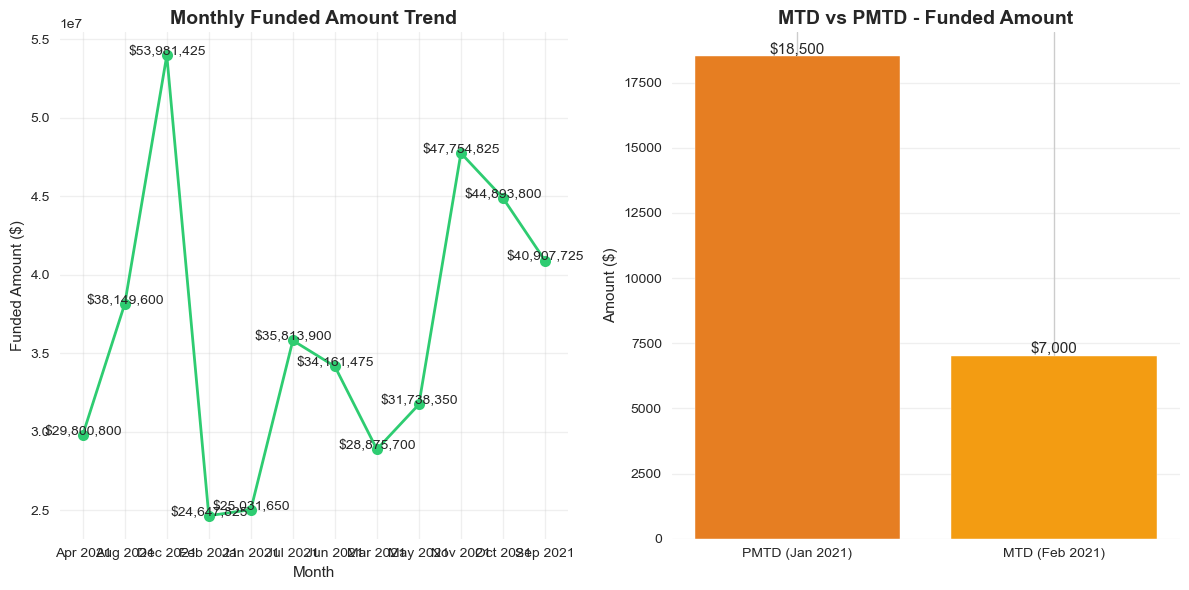

In [20]:
# Monthly Funded Amount
monthly_funded = df.groupby('month_year')['loan_amount'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(monthly_funded['month_year'], monthly_funded['loan_amount'], 
         marker='o', linewidth=2, markersize=8, color='#2ecc71')
plt.title('Monthly Funded Amount Trend', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Funded Amount ($)')
plt.grid(True, alpha=0.3)
for i, v in enumerate(monthly_funded['loan_amount']):
    plt.text(i, v+200, f'${v:,.0f}', ha='center', fontsize=10)

# MTD vs PMTD Funded
plt.subplot(1, 2, 2)
mtd_pmtd_funded = pd.DataFrame({
    'Period': ['PMTD (Jan 2021)', 'MTD (Feb 2021)'],
    'Amount': [18500, 7000]
})
bars = plt.bar(mtd_pmtd_funded['Period'], mtd_pmtd_funded['Amount'], 
               color=['#e67e22', '#f39c12'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=11)
plt.title('MTD vs PMTD - Funded Amount', fontsize=14, fontweight='bold')
plt.ylabel('Amount ($)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

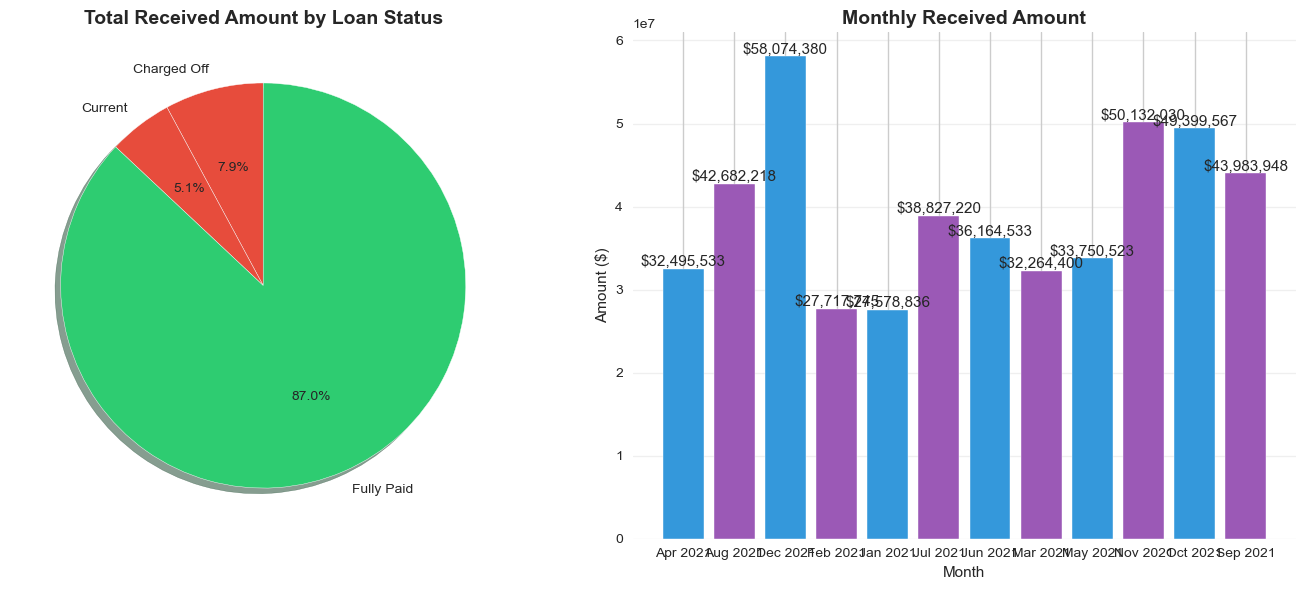

In [21]:
# Total Received by Loan Status
received_by_status = df.groupby('loan_status')['total_payment'].sum()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
colors = ['#2ecc71' if status == 'Fully Paid' else '#e74c3c' 
          for status in received_by_status.index]
plt.pie(received_by_status.values, labels=received_by_status.index, 
        autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title('Total Received Amount by Loan Status', fontsize=14, fontweight='bold')

# Monthly Received
plt.subplot(1, 2, 2)
monthly_received = df.groupby('month_year')['total_payment'].sum().reset_index()
bars = plt.bar(monthly_received['month_year'], monthly_received['total_payment'], 
               color=['#3498db', '#9b59b6'])
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=11)
plt.title('Monthly Received Amount', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

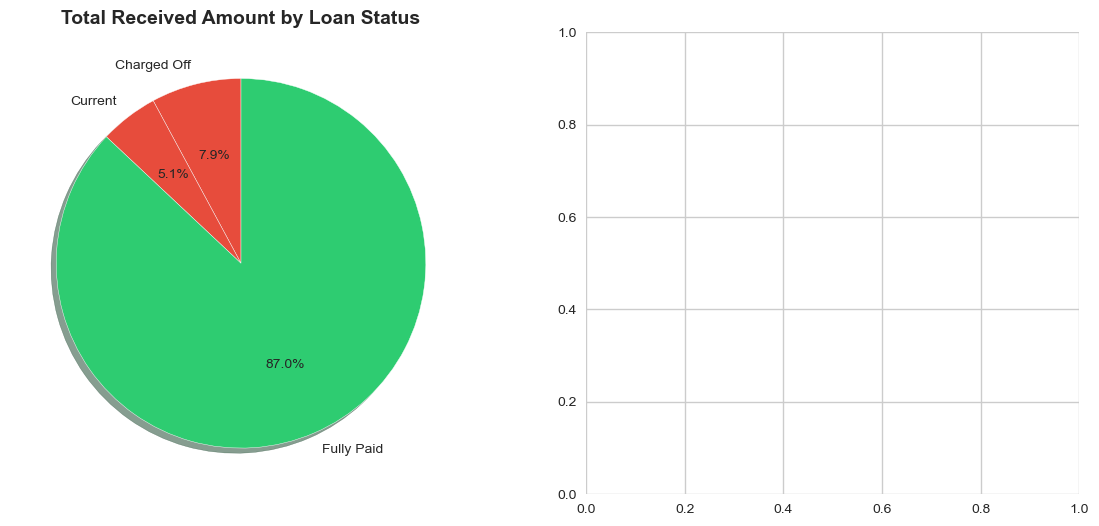

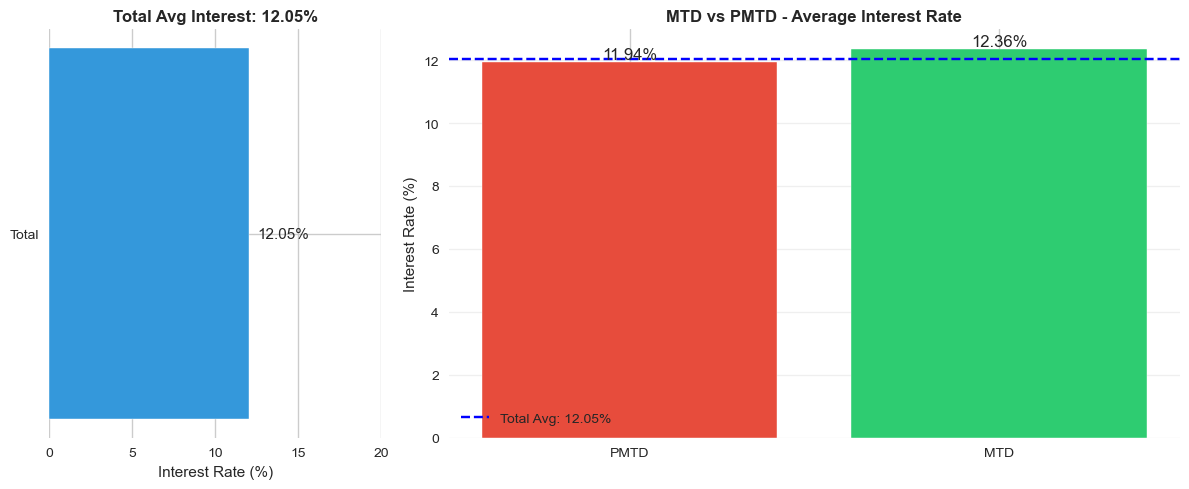

In [17]:
# Average Interest Rate Visualization
avg_int_total = df['int_rate'].mean() * 100
avg_int_mtd = mtd_data['int_rate'].mean() * 100
avg_int_pmtd = pmtd_data['int_rate'].mean() * 100

plt.figure(figsize=(12, 5))

# Gauge style for total
plt.subplot(1, 3, 1)
plt.barh(['Total'], [avg_int_total], color='#3498db', height=0.3)
plt.xlim(0, 20)
plt.xlabel('Interest Rate (%)')
plt.title(f'Total Avg Interest: {avg_int_total:.2f}%', fontweight='bold')
for i, v in enumerate([avg_int_total]):
    plt.text(v+0.5, i, f'{v:.2f}%', va='center', fontsize=11)

# MTD vs PMTD comparison
plt.subplot(1, 3, (2,3))
periods = ['PMTD', 'MTD']
values = [avg_int_pmtd, avg_int_mtd]
colors = ['#e74c3c', '#2ecc71']
bars = plt.bar(periods, values, color=colors)
plt.axhline(y=avg_int_total, color='blue', linestyle='--', label=f'Total Avg: {avg_int_total:.2f}%')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=12)
plt.ylabel('Interest Rate (%)')
plt.title('MTD vs PMTD - Average Interest Rate', fontweight='bold')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

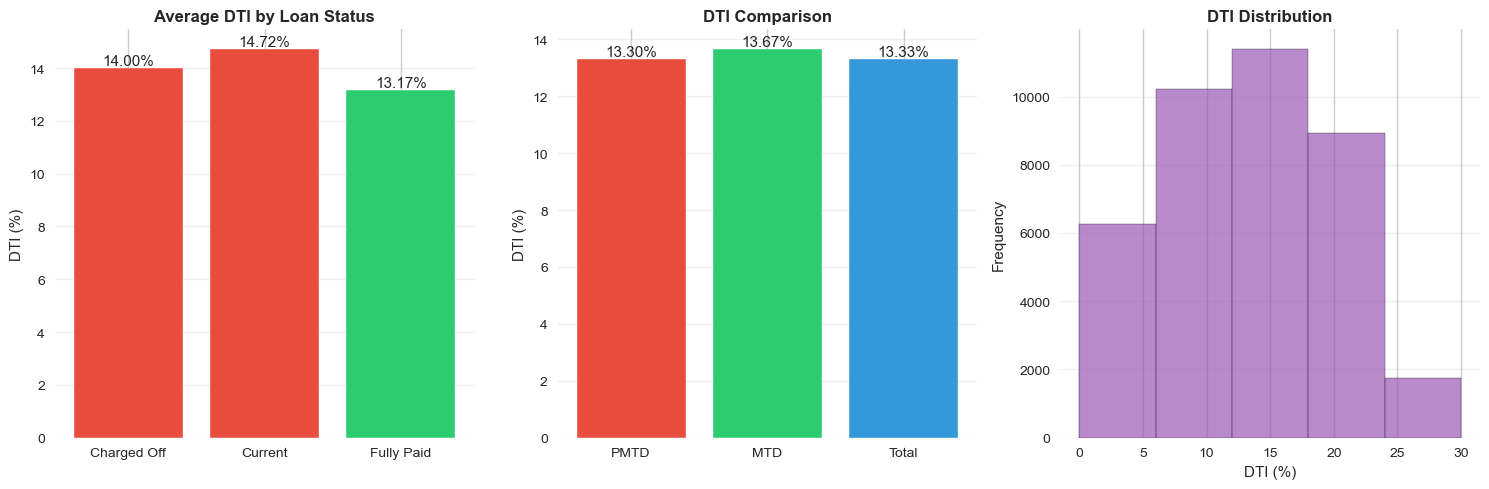

In [22]:
# Average DTI Visualization
avg_dti_total = df['dti'].mean() * 100
avg_dti_mtd = mtd_data['dti'].mean() * 100
avg_dti_pmtd = pmtd_data['dti'].mean() * 100

# DTI by Loan Status
dti_by_status = df.groupby('loan_status')['dti'].mean() * 100

plt.figure(figsize=(15, 5))

# DTI by Loan Status
plt.subplot(1, 3, 1)
colors = ['#2ecc71' if status == 'Fully Paid' else '#e74c3c' 
          for status in dti_by_status.index]
bars = plt.bar(dti_by_status.index, dti_by_status.values, color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=11)
plt.title('Average DTI by Loan Status', fontweight='bold')
plt.ylabel('DTI (%)')
plt.grid(axis='y', alpha=0.3)

# MTD vs PMTD DTI
plt.subplot(1, 3, 2)
periods = ['PMTD', 'MTD', 'Total']
values = [avg_dti_pmtd, avg_dti_mtd, avg_dti_total]
colors = ['#e74c3c', '#2ecc71', '#3498db']
bars = plt.bar(periods, values, color=colors)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}%', ha='center', va='bottom', fontsize=11)
plt.title('DTI Comparison', fontweight='bold')
plt.ylabel('DTI (%)')
plt.grid(axis='y', alpha=0.3)

# DTI Distribution
plt.subplot(1, 3, 3)
plt.hist(df['dti']*100, bins=5, color='#9b59b6', edgecolor='black', alpha=0.7)
plt.xlabel('DTI (%)')
plt.ylabel('Frequency')
plt.title('DTI Distribution', fontweight='bold')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

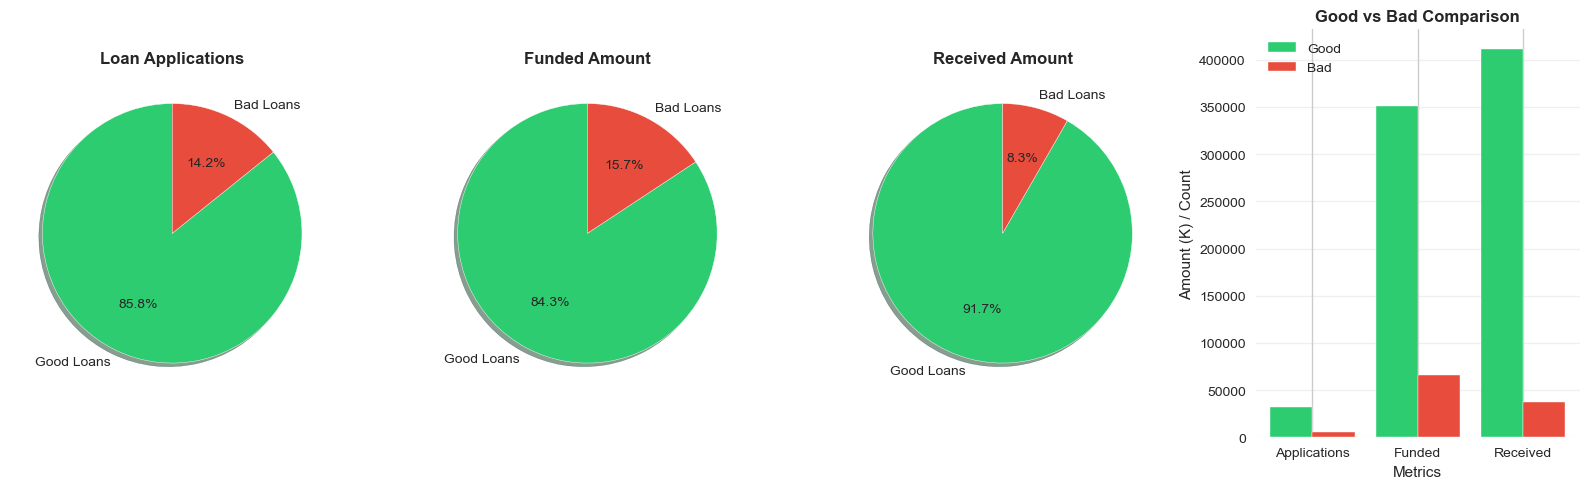

In [23]:
# Good Loan vs Bad Loan Analysis
good_loans = df[df['loan_status'] == 'Fully Paid']
bad_loans = df[df['loan_status'] == 'Charged Off']

plt.figure(figsize=(16, 5))

# 1. Applications Pie Chart
plt.subplot(1, 4, 1)
sizes = [len(good_loans), len(bad_loans)]
labels = ['Good Loans', 'Bad Loans']
colors = ['#2ecc71', '#e74c3c']
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title('Loan Applications', fontweight='bold')

# 2. Funded Amount Pie Chart
plt.subplot(1, 4, 2)
sizes = [good_loans['loan_amount'].sum(), bad_loans['loan_amount'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title('Funded Amount', fontweight='bold')

# 3. Received Amount Pie Chart
plt.subplot(1, 4, 3)
sizes = [good_loans['total_payment'].sum(), bad_loans['total_payment'].sum()]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90, shadow=True)
plt.title('Received Amount', fontweight='bold')

# 4. Comparison Bar Chart
plt.subplot(1, 4, 4)
x = ['Applications', 'Funded', 'Received']
good_values = [len(good_loans), good_loans['loan_amount'].sum()/1000, good_loans['total_payment'].sum()/1000]
bad_values = [len(bad_loans), bad_loans['loan_amount'].sum()/1000, bad_loans['total_payment'].sum()/1000]

x_pos = range(len(x))
plt.bar(x_pos, good_values, width=0.4, label='Good', color='#2ecc71')
plt.bar([p + 0.4 for p in x_pos], bad_values, width=0.4, label='Bad', color='#e74c3c')
plt.xlabel('Metrics')
plt.ylabel('Amount (K) / Count')
plt.title('Good vs Bad Comparison', fontweight='bold')
plt.xticks([p + 0.2 for p in x_pos], x)
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

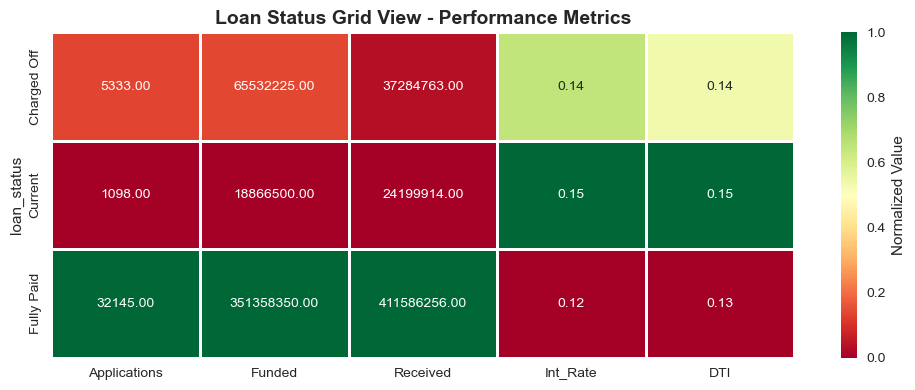


📊 LOAN STATUS GRID VIEW - DETAILS
             Applications     Funded   Received  Int_Rate  DTI
loan_status                                                   
Charged Off          5333   65532225   37284763      0.14 0.14
Current              1098   18866500   24199914      0.15 0.15
Fully Paid          32145  351358350  411586256      0.12 0.13


In [24]:
# Loan Status Grid View - Heatmap
status_grid = df.groupby('loan_status').agg({
    'id': 'count',
    'loan_amount': 'sum',
    'total_payment': 'sum',
    'int_rate': 'mean',
    'dti': 'mean'
}).rename(columns={
    'id': 'Applications',
    'loan_amount': 'Funded',
    'total_payment': 'Received',
    'int_rate': 'Int_Rate',
    'dti': 'DTI'
})

# Normalize for heatmap
status_grid_norm = (status_grid - status_grid.min()) / (status_grid.max() - status_grid.min())

plt.figure(figsize=(10, 4))
sns.heatmap(status_grid_norm, annot=status_grid.round(2), fmt='.2f', 
            cmap='RdYlGn', linewidths=1, cbar_kws={'label': 'Normalized Value'})
plt.title('Loan Status Grid View - Performance Metrics', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print detailed table
print("\n📊 LOAN STATUS GRID VIEW - DETAILS")
print("=" * 60)
print(status_grid.to_string(float_format=lambda x: f"{x:,.2f}"))

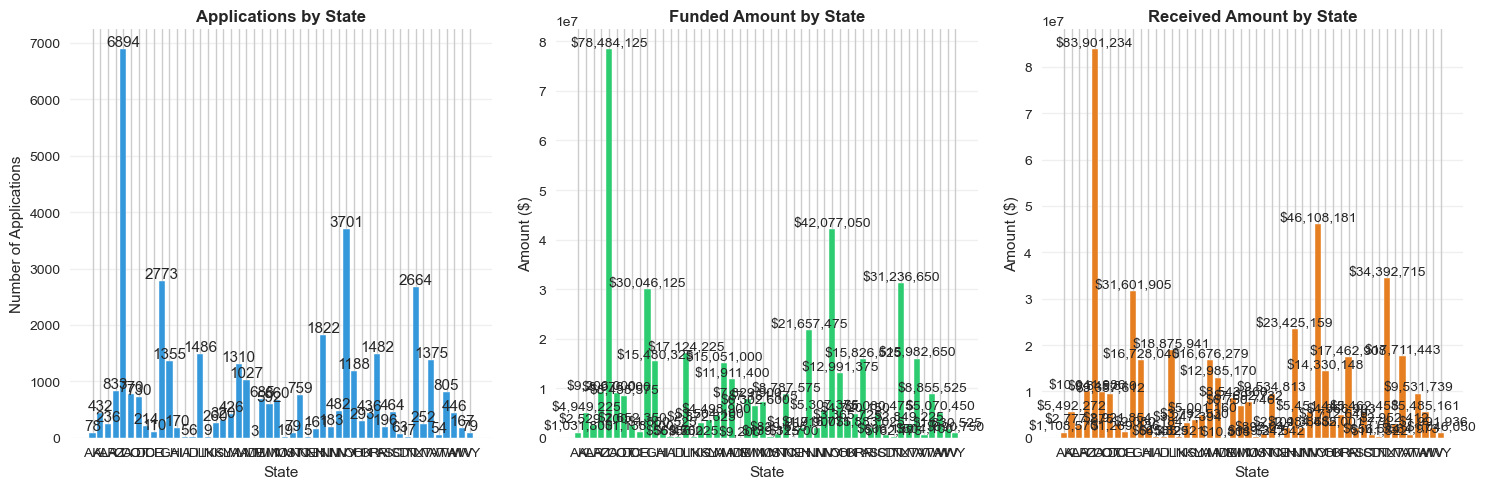

In [25]:
# Regional Analysis by State
state_analysis = df.groupby('address_state').agg({
    'id': 'count',
    'loan_amount': 'sum',
    'total_payment': 'sum'
}).reset_index()

plt.figure(figsize=(15, 5))

# Applications by State
plt.subplot(1, 3, 1)
bars = plt.bar(state_analysis['address_state'], state_analysis['id'], color='#3498db')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)
plt.title('Applications by State', fontweight='bold')
plt.xlabel('State')
plt.ylabel('Number of Applications')
plt.grid(axis='y', alpha=0.3)

# Funded Amount by State
plt.subplot(1, 3, 2)
bars = plt.bar(state_analysis['address_state'], state_analysis['loan_amount'], color='#2ecc71')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=10)
plt.title('Funded Amount by State', fontweight='bold')
plt.xlabel('State')
plt.ylabel('Amount ($)')
plt.grid(axis='y', alpha=0.3)

# Received Amount by State
plt.subplot(1, 3, 3)
bars = plt.bar(state_analysis['address_state'], state_analysis['total_payment'], color='#e67e22')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.0f}', ha='center', va='bottom', fontsize=10)
plt.title('Received Amount by State', fontweight='bold')
plt.xlabel('State')
plt.ylabel('Amount ($)')
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

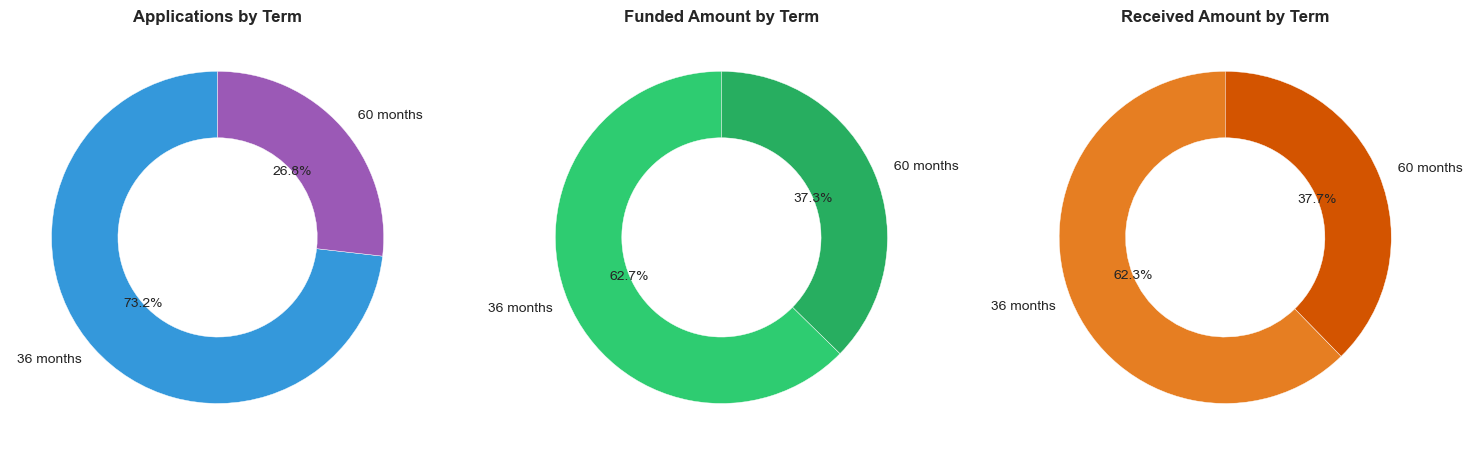

In [26]:
# Loan Term Analysis - Donut Chart
term_apps = df.groupby('term')['id'].count()
term_funded = df.groupby('term')['loan_amount'].sum()
term_received = df.groupby('term')['total_payment'].sum()

plt.figure(figsize=(15, 5))

# Applications Donut
plt.subplot(1, 3, 1)
plt.pie(term_apps.values, labels=term_apps.index, autopct='%1.1f%%', 
        colors=['#3498db', '#9b59b6'], startangle=90, wedgeprops={'width': 0.4})
plt.title('Applications by Term', fontweight='bold')

# Funded Amount Donut
plt.subplot(1, 3, 2)
plt.pie(term_funded.values, labels=term_funded.index, autopct='%1.1f%%', 
        colors=['#2ecc71', '#27ae60'], startangle=90, wedgeprops={'width': 0.4})
plt.title('Funded Amount by Term', fontweight='bold')

# Received Amount Donut
plt.subplot(1, 3, 3)
plt.pie(term_received.values, labels=term_received.index, autopct='%1.1f%%', 
        colors=['#e67e22', '#d35400'], startangle=90, wedgeprops={'width': 0.4})
plt.title('Received Amount by Term', fontweight='bold')

plt.tight_layout()
plt.show()

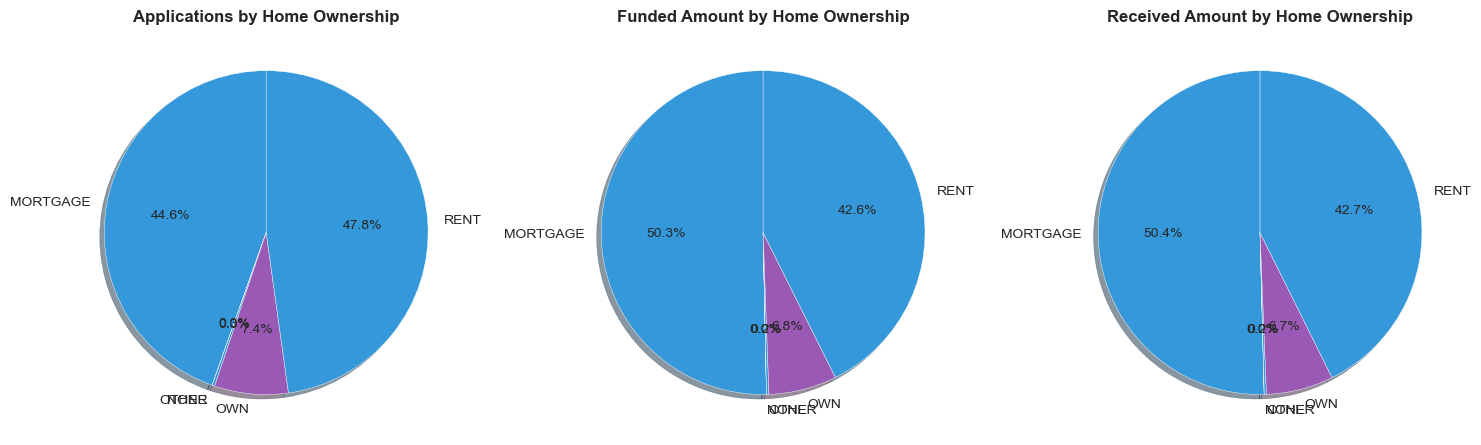

In [27]:
# Home Ownership Analysis
home_apps = df.groupby('home_ownership')['id'].count()
home_funded = df.groupby('home_ownership')['loan_amount'].sum()
home_received = df.groupby('home_ownership')['total_payment'].sum()

plt.figure(figsize=(15, 5))

# Applications by Home Ownership
plt.subplot(1, 3, 1)
colors = ['#3498db', '#9b59b6']
plt.pie(home_apps.values, labels=home_apps.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, shadow=True)
plt.title('Applications by Home Ownership', fontweight='bold')

# Funded Amount by Home Ownership
plt.subplot(1, 3, 2)
plt.pie(home_funded.values, labels=home_funded.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, shadow=True)
plt.title('Funded Amount by Home Ownership', fontweight='bold')

# Received Amount by Home Ownership
plt.subplot(1, 3, 3)
plt.pie(home_received.values, labels=home_received.index, autopct='%1.1f%%', 
        colors=colors, startangle=90, shadow=True)
plt.title('Received Amount by Home Ownership', fontweight='bold')

plt.tight_layout()
plt.show()

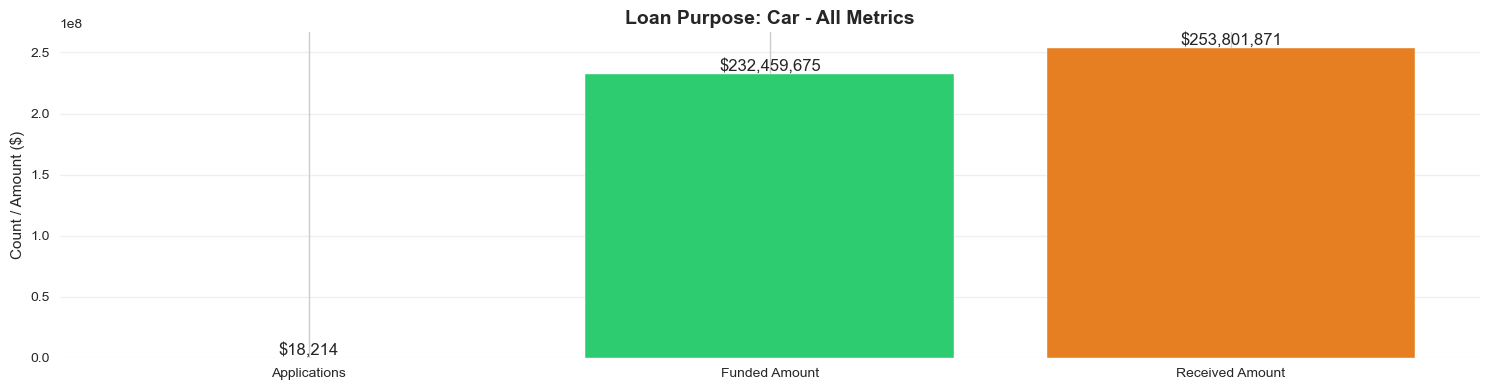


🚗 All loans are for 'car' purpose
   Applications: 18214
   Total Funded: $232,459,675.00
   Total Received: $253,801,871.00


In [28]:
# Purpose Analysis (all are 'car' in this dataset)
purpose_apps = df.groupby('purpose')['id'].count()
purpose_funded = df.groupby('purpose')['loan_amount'].sum()
purpose_received = df.groupby('purpose')['total_payment'].sum()

plt.figure(figsize=(15, 4))

metrics = ['Applications', 'Funded Amount', 'Received Amount']
values = [purpose_apps.values[0], purpose_funded.values[0], purpose_received.values[0]]

bars = plt.bar(metrics, values, color=['#3498db', '#2ecc71', '#e67e22'])
for bar in bars:
    height = bar.get_height()
    if 'Applications' in bar.get_label():
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{int(height)}', ha='center', va='bottom', fontsize=12)
    else:
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'${height:,.0f}', ha='center', va='bottom', fontsize=12)

plt.title('Loan Purpose: Car - All Metrics', fontsize=14, fontweight='bold')
plt.ylabel('Count / Amount ($)')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🚗 All loans are for 'car' purpose")
print(f"   Applications: {purpose_apps.values[0]}")
print(f"   Total Funded: ${purpose_funded.values[0]:,.2f}")
print(f"   Total Received: ${purpose_received.values[0]:,.2f}")

In [1]:
# Complete Dashboard - All KPIs
fig = plt.figure(figsize=(20, 12))

# 1. Total Applications (Top Left)
ax1 = plt.subplot(3, 4, 1)
total_apps = len(df)
ax1.text(0.5, 0.7, f'{total_apps}', ha='center', fontsize=40, fontweight='bold', color='#3498db')
ax1.text(0.5, 0.3, 'Total Applications', ha='center', fontsize=14)
ax1.axis('off')

# 2. MTD Applications
ax2 = plt.subplot(3, 4, 2)
mtd_apps = len(mtd_data)
ax2.text(0.5, 0.7, f'{mtd_apps}', ha='center', fontsize=40, fontweight='bold', color='#2ecc71')
ax2.text(0.5, 0.3, f'MTD ({current_month_name})', ha='center', fontsize=12)
ax2.axis('off')

# 3. PMTD Applications
ax3 = plt.subplot(3, 4, 3)
pmtd_apps = len(pmtd_data)
ax3.text(0.5, 0.7, f'{pmtd_apps}', ha='center', fontsize=40, fontweight='bold', color='#e74c3c')
ax3.text(0.5, 0.3, f'PMTD ({prev_month_name})', ha='center', fontsize=12)
ax3.axis('off')

# 4. MoM Change
ax4 = plt.subplot(3, 4, 4)
mom_change = ((mtd_apps - pmtd_apps) / pmtd_apps * 100) if pmtd_apps > 0 else 0
color = '#2ecc71' if mom_change > 0 else '#e74c3c'
ax4.text(0.5, 0.7, f'{mom_change:.1f}%', ha='center', fontsize=40, fontweight='bold', color=color)
ax4.text(0.5, 0.3, 'MoM Change', ha='center', fontsize=14)
ax4.axis('off')

# 5. Total Funded
ax5 = plt.subplot(3, 4, 5)
total_funded = df['loan_amount'].sum()
ax5.text(0.5, 0.7, f'${total_funded:,.0f}', ha='center', fontsize=35, fontweight='bold', color='#3498db')
ax5.text(0.5, 0.3, 'Total Funded', ha='center', fontsize=14)
ax5.axis('off')

# 6. MTD Funded
ax6 = plt.subplot(3, 4, 6)
mtd_funded = mtd_data['loan_amount'].sum()
ax6.text(0.5, 0.7, f'${mtd_funded:,.0f}', ha='center', fontsize=35, fontweight='bold', color='#2ecc71')
ax6.text(0.5, 0.3, f'MTD Funded', ha='center', fontsize=12)
ax6.axis('off')

# 7. Total Received
ax7 = plt.subplot(3, 4, 7)
total_received = df['total_payment'].sum()
ax7.text(0.5, 0.7, f'${total_received:,.0f}', ha='center', fontsize=35, fontweight='bold', color='#3498db')
ax7.text(0.5, 0.3, 'Total Received', ha='center', fontsize=14)
ax7.axis('off')

# 8. MTD Received
ax8 = plt.subplot(3, 4, 8)
mtd_received = mtd_data['total_payment'].sum()
ax8.text(0.5, 0.7, f'${mtd_received:,.0f}', ha='center', fontsize=35, fontweight='bold', color='#2ecc71')
ax8.text(0.5, 0.3, f'MTD Received', ha='center', fontsize=12)
ax8.axis('off')

# 9. Avg Interest Rate
ax9 = plt.subplot(3, 4, 9)
avg_int = df['int_rate'].mean() * 100
ax9.text(0.5, 0.7, f'{avg_int:.2f}%', ha='center', fontsize=40, fontweight='bold', color='#9b59b6')
ax9.text(0.5, 0.3, 'Avg Interest Rate', ha='center', fontsize=14)
ax9.axis('off')

# 10. Avg DTI
ax10 = plt.subplot(3, 4, 10)
avg_dti = df['dti'].mean() * 100
ax10.text(0.5, 0.7, f'{avg_dti:.2f}%', ha='center', fontsize=40, fontweight='bold', color='#e67e22')
ax10.text(0.5, 0.3, 'Avg DTI', ha='center', fontsize=14)
ax10.axis('off')

# 11. Good Loan %
ax11 = plt.subplot(3, 4, 11)
good_pct = (len(good_loans) / len(df) * 100)
ax11.text(0.5, 0.7, f'{good_pct:.1f}%', ha='center', fontsize=40, fontweight='bold', color='#2ecc71')
ax11.text(0.5, 0.3, 'Good Loans', ha='center', fontsize=14)
ax11.axis('off')

# 12. Bad Loan %
ax12 = plt.subplot(3, 4, 12)
bad_pct = (len(bad_loans) / len(df) * 100)
ax12.text(0.5, 0.7, f'{bad_pct:.1f}%', ha='center', fontsize=40, fontweight='bold', color='#e74c3c')
ax12.text(0.5, 0.3, 'Bad Loans', ha='center', fontsize=14)
ax12.axis('off')

plt.suptitle('BANK LOAN REPORT - COMPLETE DASHBOARD', fontsize=18, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined